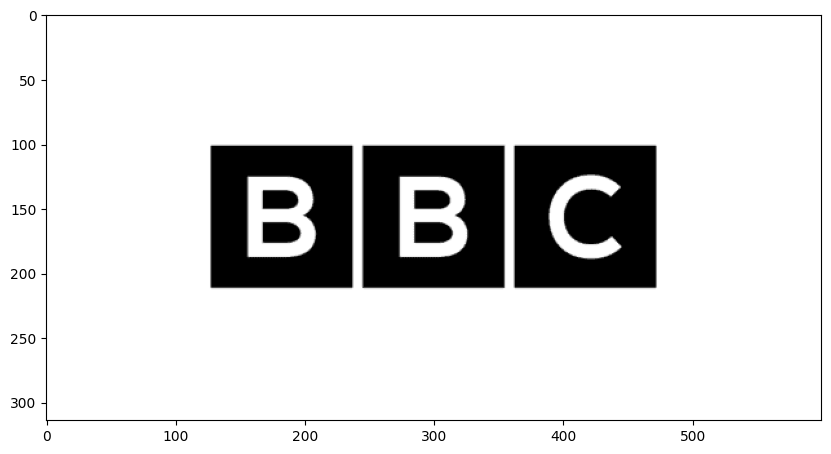

In [17]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]

image = cv2.imread("/Users/hellokhanhne/Documents/project/py/mask_detection/bt/assets/BBC_logo-600x314.png") 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [18]:
def my_harris(img, window_size, k, threshold, threshold_point_size = 1, color = (0,255,0)):


    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)
        
    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))
    
    #   Step 1 - Calculate the x & y image derivatives (dx & dy)
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    # dy, dx = np.gradient(gray)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 & dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calculate the sum of the product of the derivatives for each pixel (Sx2, Sy2 & Sxy)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R
    
    #   Step 6 - Apply a threshold
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                cv2.circle(img,(x,y),threshold_point_size,color)
                
    plt.imshow(img)
    plt.show()

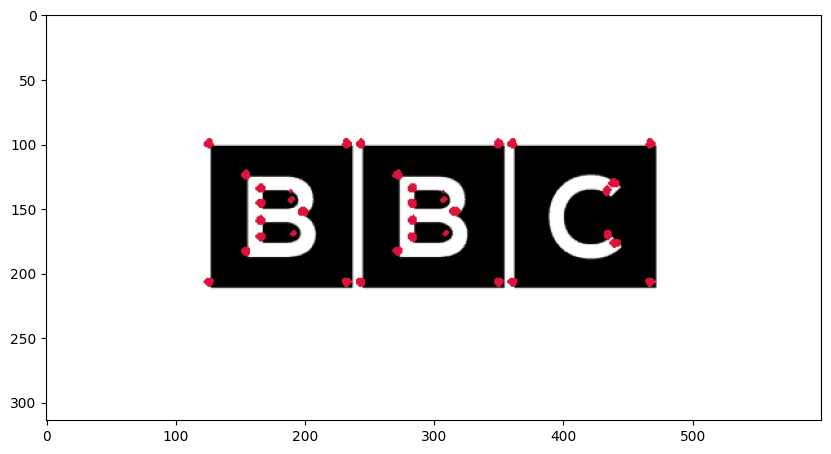

In [20]:

my_harris(image, 6, 0.04, 0.3, color = (220,20,60))
